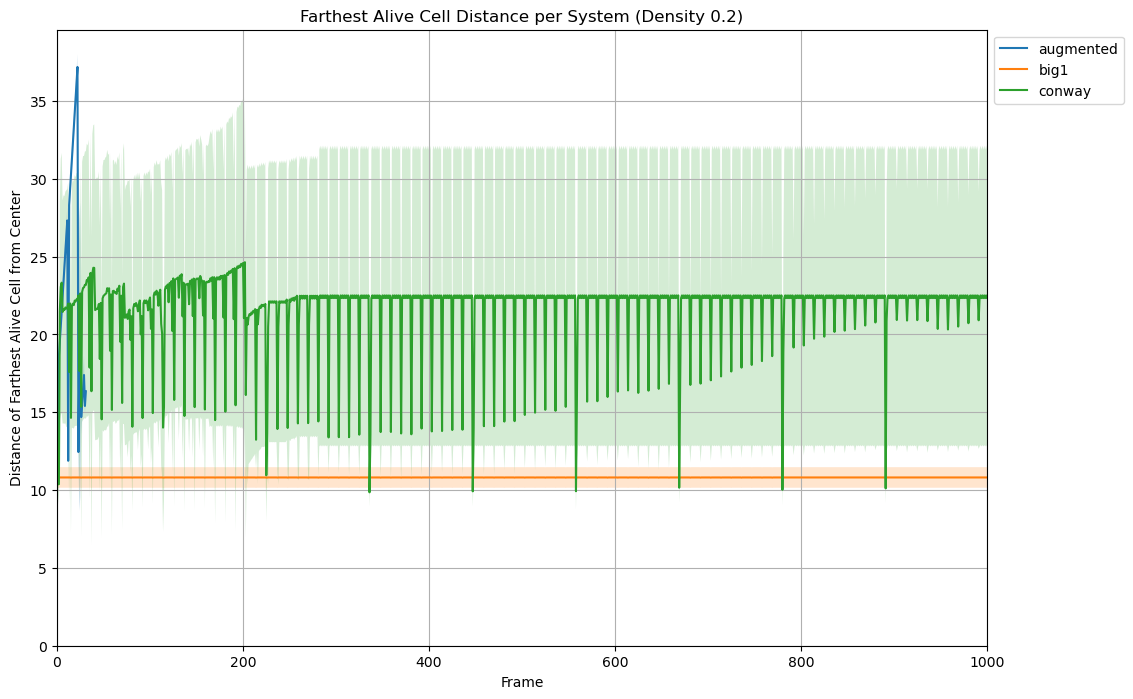

In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.2"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)


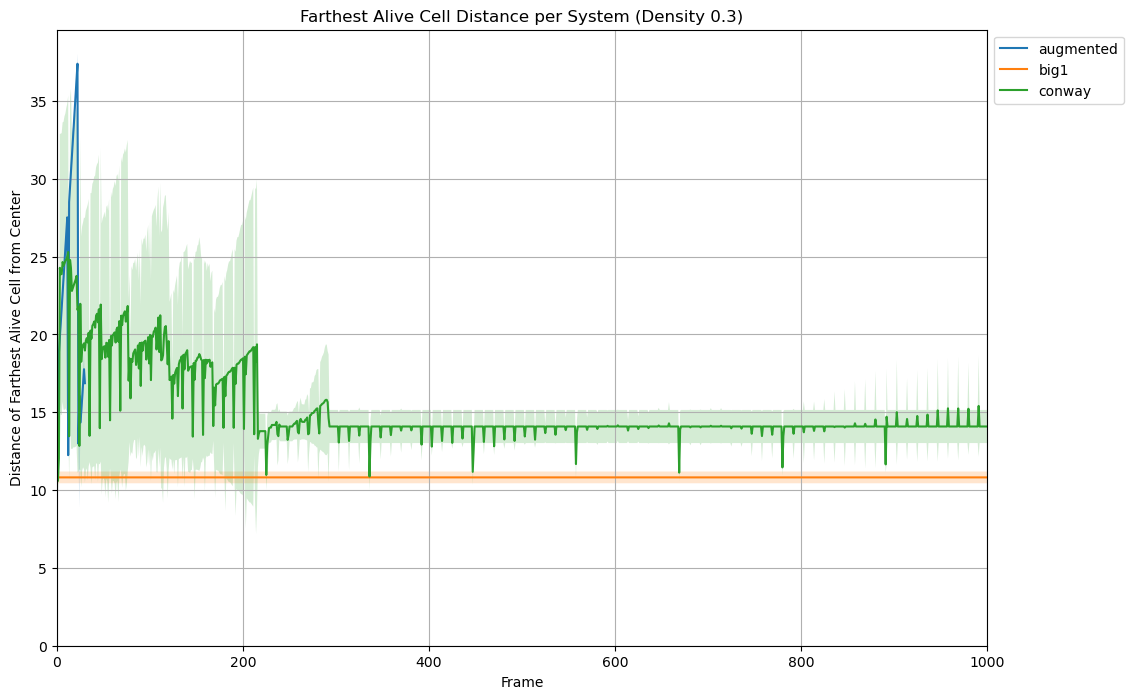

In [12]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.3"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)


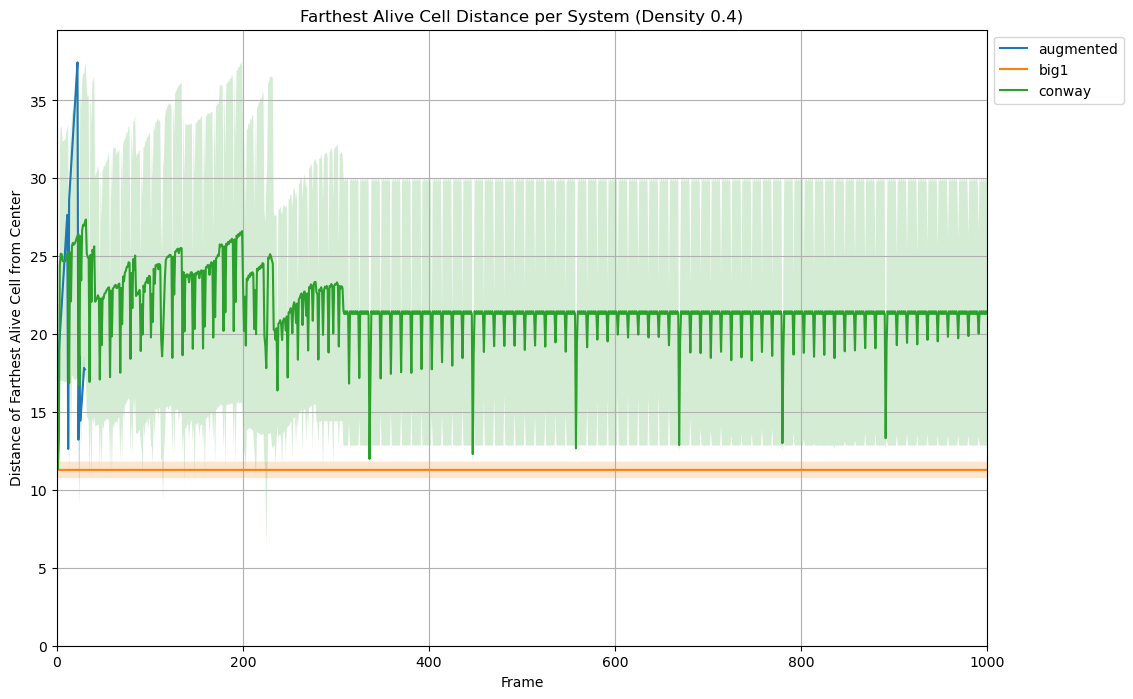

In [13]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.4"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)


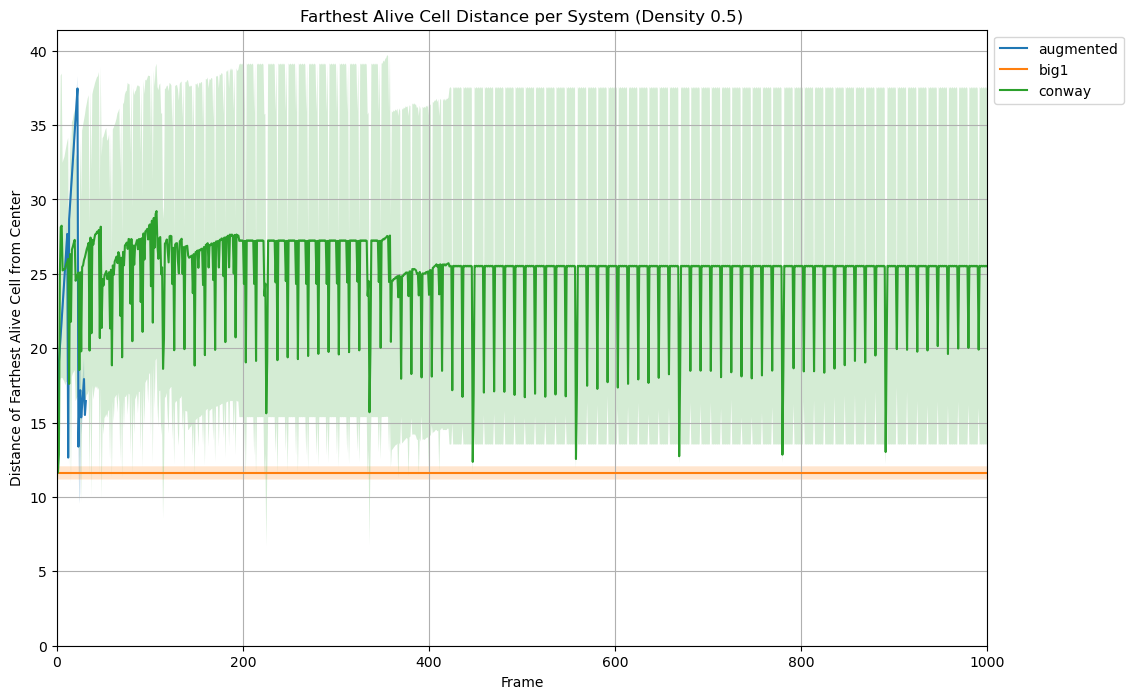

In [14]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.5"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)


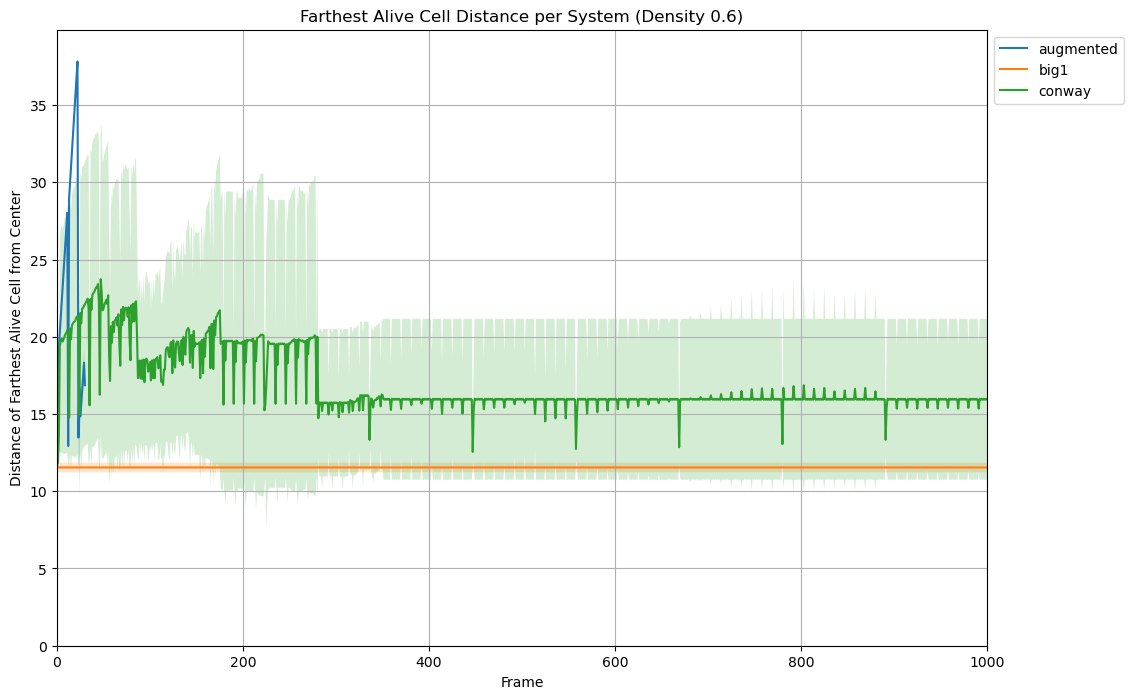

In [15]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.6"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)


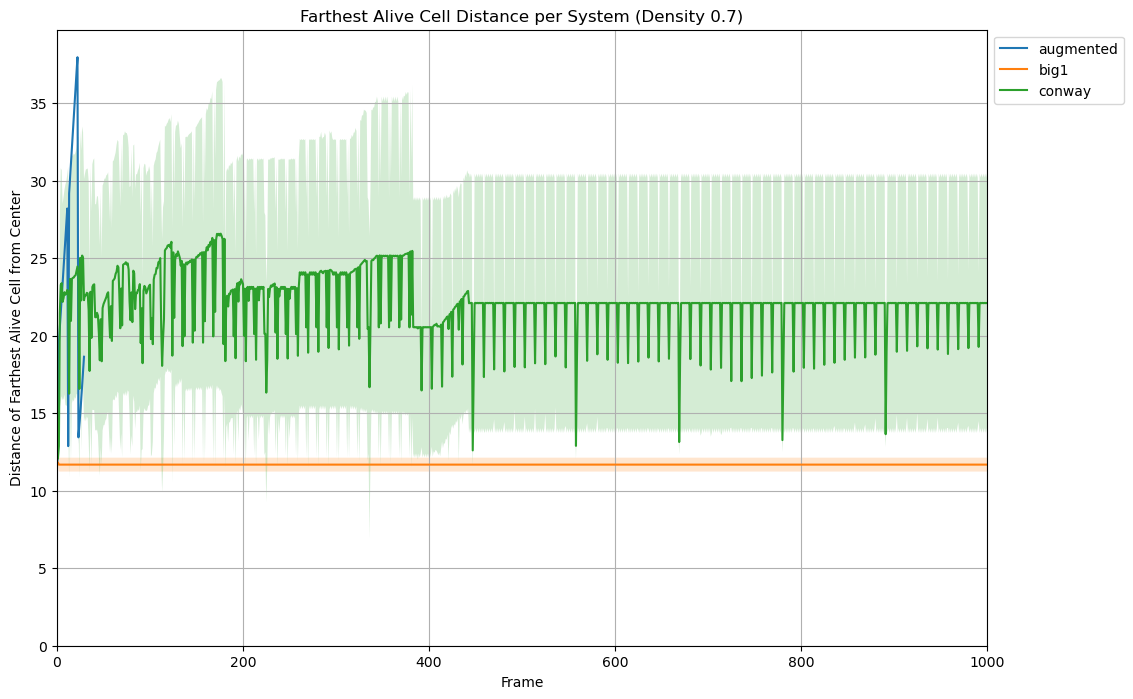

In [16]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.7"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)


In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def count_live_cells_in_frame(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return sum(1 for cell in data if cell["state"] == "ALIVE")

def calculate_farthest_cell_distance(cells, field_size=75):
    center_x, center_y = field_size / 2, field_size / 2
    max_distance = 0
    for cell in cells:
        if cell["state"] == "ALIVE":
            x = cell["coordinates"]["x"]
            y = cell["coordinates"]["y"]
            distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
            if distance > max_distance:
                max_distance = distance
    return max_distance

def process_directory(base_path, target_density):
    systems_data = {}
    for system in os.listdir(base_path):
        system_path = os.path.join(base_path, system)
        if os.path.isdir(system_path):
            density_path = os.path.join(system_path, target_density)
            if os.path.isdir(density_path):
                runs_data = []
                for run in os.listdir(density_path):
                    run_path = os.path.join(density_path, run)
                    if os.path.isdir(run_path):
                        distances = []
                        for frame_file in sorted(os.listdir(run_path)):
                            if frame_file.startswith("frame") and frame_file.endswith(".json"):
                                frame_path = os.path.join(run_path, frame_file)
                                with open(frame_path, 'r') as f:
                                    cells = json.load(f)
                                distances.append(calculate_farthest_cell_distance(cells))
                        if distances:
                            runs_data.append(distances)
                if runs_data:
                    systems_data[system] = runs_data
    return systems_data

def plot_results(systems_data, target_density):
    plt.figure(figsize=(12, 8))
    for system, runs_data in systems_data.items():
        # Find the maximum number of frames across all runs
        max_frames = max(len(run) for run in runs_data)
        
        # Create a list to store the distances for each frame
        all_distances = [[] for _ in range(max_frames)]
        
        # Collect distances for each frame
        for run in runs_data:
            for i, distance in enumerate(run):
                all_distances[i].append(distance)
        
        # Compute mean and std deviation for each frame
        mean_values = [np.mean(distances) if distances else np.nan for distances in all_distances]
        std_dev = [np.std(distances) if distances else np.nan for distances in all_distances]
        
        plt.plot(mean_values, label=f'{system}')
        plt.fill_between(range(len(mean_values)), np.array(mean_values) - np.array(std_dev), np.array(mean_values) + np.array(std_dev), alpha=0.2)
    
    plt.xlabel('Frame')
    plt.ylabel('Distance of Farthest Alive Cell from Center')
    plt.title(f'Farthest Alive Cell Distance per System (Density {target_density})')
    plt.ylim(bottom=0)  # Fix the y-axis origin at 0.0
    plt.xlim(0, 1000)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    base_path = "../GOF/output"  # Cambia esto por la ruta real del directorio base
    target_density = "0.8"  # Cambia esto a la densidad que quieres graficar
    systems_data = process_directory(base_path, target_density)
    plot_results(systems_data, target_density)
